# Singular Value Decomposition

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sympy as smp
from IPython.display import display
from scipy.linalg import diagsvd

## Matrix approximation

In [3]:
X = np.random.rand(3,3)
smp.Matrix(X)

Matrix([
[0.150084513421186, 0.988111514134066, 0.591517540614144],
[0.989310098789328, 0.985939947989704, 0.065437161369486],
[0.981761912791941, 0.784866919255995, 0.182971327875806]])

In [4]:
u, s, v = np.linalg.svd(X, full_matrices=True)
display("u =", smp.Matrix(u))
display("s =",smp.Matrix(np.diag(s)))
display("v =",smp.Matrix(v))

'u ='

Matrix([
[-0.459273678332777,   0.88791126516356, 0.0261012181004443],
[-0.659018075890393, -0.320881719311749, -0.680242675713059],
[-0.595619731070426, -0.329618730364617,  0.732522101067546]])

's ='

Matrix([
[2.08627040628922,                0,                 0],
[               0, 0.73910967545108,                 0],
[               0,                0, 0.135722222779967]])

'v ='

Matrix([
[-0.625834439696371, -0.753041444581805, -0.203125175278886],
[-0.687038645710654,  0.408976382799423,  0.600596551448949],
[ 0.369200695272909,  -0.51542885159297,  0.773320079627803]])

In [5]:
display("v =",smp.Matrix(u @ np.diag(s) @ v))

'v ='

Matrix([
[0.150084513421186, 0.988111514134067,  0.591517540614144],
[0.989310098789328, 0.985939947989705, 0.0654371613694859],
[0.981761912791942, 0.784866919255995,  0.182971327875806]])

If the matrix is a skinny and tall you can use the "economy" version

In [6]:
X = np.random.rand(20,2)
smp.Matrix(X)

Matrix([
[ 0.175487842839447, 0.0513637051789007],
[ 0.764908557368127, 0.0220567251652078],
[ 0.960457663115641,  0.294754702874185],
[ 0.647184119116256,  0.983487640859234],
[ 0.446984103701901, 0.0289869170823855],
[ 0.648630202391033,  0.148708296614351],
[ 0.604532923320645,  0.901940555685569],
[ 0.420761618988337,  0.400507082173884],
[ 0.888733976918729,  0.839533676717116],
[ 0.161810784454625, 0.0606713175321947],
[ 0.476982171741091,  0.012848056376311],
[0.0569918229595298,  0.232934170808701],
[ 0.104470298654792,  0.385888151734805],
[ 0.958638361676997,  0.997118673875561],
[0.0656420678808689, 0.0338090860994565],
[ 0.740851055763509,  0.184968781702382],
[   0.2498333790147, 0.0303826041665491],
[ 0.844739584568999,  0.696186897986323],
[ 0.315548410149685,  0.190348133617403],
[ 0.969434873856657,  0.787078453351328]])

In [7]:
u, s, v = np.linalg.svd(X, full_matrices=False)
display("u =", smp.Matrix(u))
display("s =",smp.Matrix(np.diag(s)))
display("v =",smp.Matrix(v))

'u ='

Matrix([
[-0.0498371153148496, -0.0668907692163314],
[  -0.18017301643633,  -0.443992703154838],
[ -0.275265948968314,  -0.355798096064749],
[ -0.329583678903209,   0.353043415866985],
[ -0.108241936367425,  -0.247294659911134],
[ -0.176652463072471,  -0.278310311940545],
[ -0.304791143003231,    0.31713930301563],
[ -0.170414619690659,  0.0490949422095667],
[  -0.35877183430523,  0.0988507138525602],
[-0.0483967777513023, -0.0516242741008508],
[ -0.112186049035803,  -0.277549598281593],
[-0.0558889583305045,   0.141605699161859],
[-0.0949031903131591,   0.228534081036565],
[ -0.403799974206816,   0.175771185888189],
[-0.0213216596042377, -0.0139967221079958],
[ -0.204544073669992,  -0.306462130863722],
[-0.0631033926668286,  -0.127510310344799],
[  -0.32232369457917,  0.0170801305657309],
[ -0.107603978154286, -0.0462689387626848],
[ -0.367722860737792,  0.0106323541661489]])

's ='

Matrix([
[3.39568069205643,                0],
[               0, 1.03522056531991]])

'v ='

Matrix([
[-0.781869866510721, -0.623441666751996],
[-0.623441666751996,  0.781869866510721]])

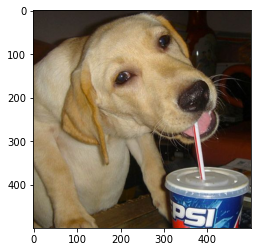

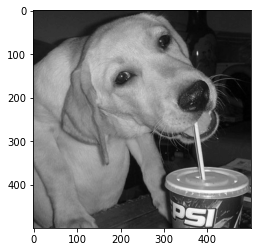

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img_rgb = mpimg.imread('pepsi-dog.jpg')
img_gray = rgb2gray(img_rgb)

plt.imshow(img_rgb)
plt.show()
plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
u, s, vT = np.linalg.svd(img_gray, full_matrices=False)

Cumulative energy of the sinuglar values

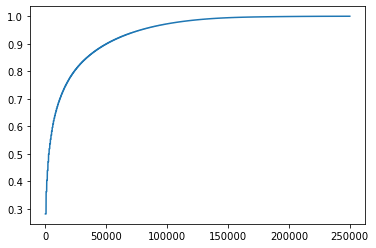

In [10]:
energy = np.cumsum(np.diag(s))/np.sum(np.diag(s))
plt.plot(energy)
plt.show()

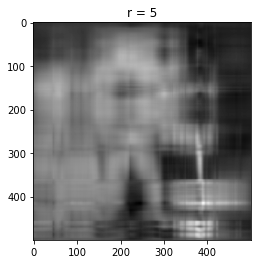

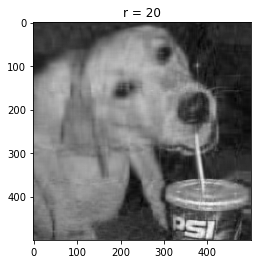

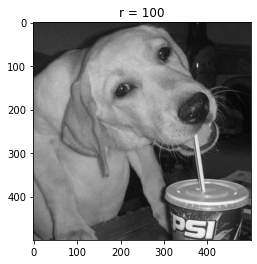

In [11]:
for i in [5, 20, 100]:
    Xapprox = u[:,:i]@np.diag(s)[:i,:i]@vT[:i,:]
    plt.imshow(Xapprox, cmap=plt.get_cmap('gray'))
    new_shape = np.shape(Xapprox)

    plt.title('r = ' + str(i))
    plt.show()

If we left or right-multiply our data matrix X by a unitary transformation, it preserves the terms in the SVD, except for the corresponding 
left or right unitary matrix U or V, respectively. This has important implications, since the
discrete Fourier transform $\mathcal{F}$ is a unitary transform, meaning that the
SVD of data X'= $\mathcal{F}$ X will be exactly the same as the SVD of X, except that the modes
U' will be be the DFT of modes U: U' = $\mathcal{F}$ U. In

## Inverse

In [12]:
X = np.random.rand(3,2)
display("X =", smp.Matrix(X))
u, s, v = np.linalg.svd(X, full_matrices=True)
display("u =", smp.Matrix(u))
display("s =",smp.Matrix(diagsvd(s,X.shape[0],X.shape[1])))
display("v =",smp.Matrix(v))

'X ='

Matrix([
[0.590200789774713, 0.864240452866821],
[0.754706272631713, 0.791301553410889],
[0.379287382258033, 0.882986624650104]])

'u ='

Matrix([
[-0.589730116685339, 0.0222353845033367, -0.807294232080402],
[-0.608608312848512, -0.669319245437595,  0.426154513314755],
[-0.530861856800792,  0.742642131421883,   0.40825035655977]])

's ='

Matrix([
[1.77458426189628,                 0],
[               0, 0.255662343890253],
[               0,                 0]])

'v ='

Matrix([
[-0.568431106693634, -0.822730865437204],
[-0.822730865437204,  0.568431106693634]])

In [13]:
X_inv = v.T @ np.reciprocal(diagsvd(s,*X.shape),where = diagsvd(s,*X.shape)!=0).T@u.T
display("X^-1 =", smp.Matrix(X_inv))

'X^-1 ='

Matrix([
[0.117346824802998, 2.34884219045681, -2.21980525221709],
[0.322847459000425, -1.2059796921475,  1.89728329154332]])

In [14]:
display(smp.Matrix(X_inv@X))

Matrix([
[                  1.0, -2.22044604925031e-16],
[-1.11022302462516e-16,                   1.0]])

## PCA

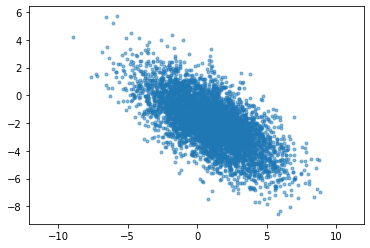

In [15]:
cov = np.array([[6, -3], [-3, 3.5]])
pts = np.random.multivariate_normal([1, -2], cov, size=5000)

plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.5)
plt.axis('equal')
plt.show()

In [16]:
u, s, v = np.linalg.svd(pts, full_matrices=True)
s = diagsvd(s,*pts.shape)
s

array([[248.0010008 ,   0.        ],
       [  0.        , 104.33269915],
       [  0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ]])

In [17]:
mean_x, mean_y = np.mean(pts, axis = 0)

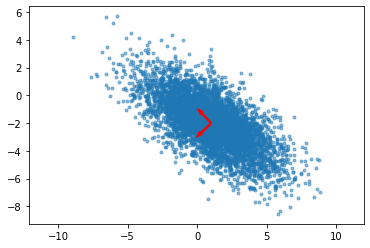

In [18]:
plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.5)
plt.arrow(mean_x,mean_y,v[0][0],v[0][1], width = 0.1, zorder = 4, color = 'r')
plt.arrow(mean_x,mean_y,v[1][0],v[1][1], width = 0.1, zorder = 4, color = 'r')
plt.axis('equal')
plt.show()

## Eigenfaces

In [33]:
import os
import scipy.io as sio

mat_content = sio.loadmat('yalefaces.mat')
faces = mat_content['X']

In [34]:
faces.shape

(1024, 2414)

In [20]:
avgFace = np.mean(face, axis = 1)
avgFace.shape

(77760,)

In [21]:
u, s, v = np.linalg.svd(face-np.tile(avgFace,(face.shape[1],1)).T, full_matrices = False)
s = diagsvd(s,*face.shape)

(243, 320)


C:\Users\Robin\AppData\Local\Temp/ipykernel_348/2883397673.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  test_face = color.rgb2gray(raw_test_face)


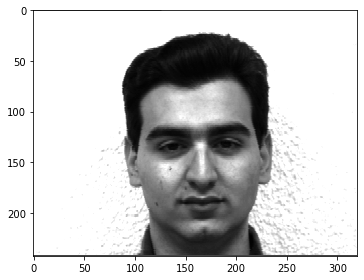

In [22]:
raw_test_face = mpimg.imread(r'D:\Python kod\SVD\test\subject15.normal')
test_face = color.rgb2gray(raw_test_face)
io.imshow(test_face)
print(test_face.shape)

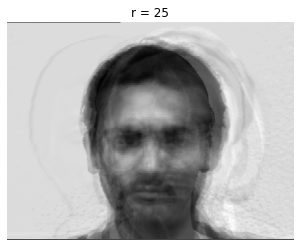

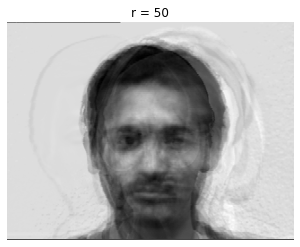

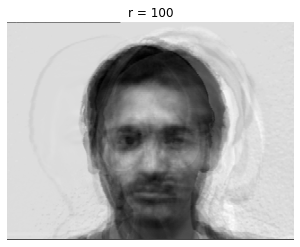

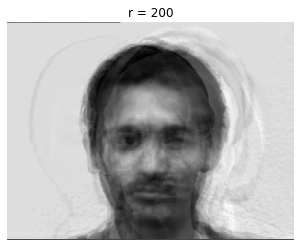

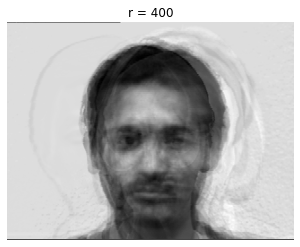

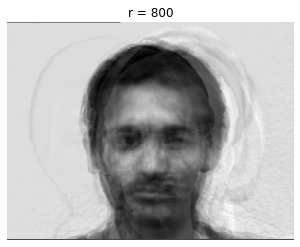

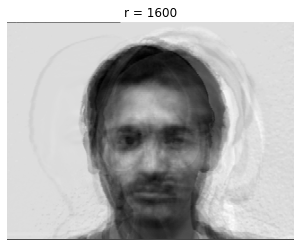

In [27]:
centered_face = test_face.flatten()-avgFace
r = [25,50,100,200,400,800,1600]

for i in r:
    first = np.dot(u[:,:i].T, centered_face)
    second = np.dot(u[:,:i],first)
    created_face = avgFace + second
    img = plt.imshow(np.reshape(created_face,test_face.shape))
    img.set_cmap('gray')
    plt.title('r = '+str(i))
    plt.axis('off')
    plt.show()